# Keras regrasión

# 1. Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Importación de fuente de datos

In [2]:
# Crear dataFrame
# Lectura de datos históricos
df = pd.read_excel("./viviendas_Madrid.xlsx", sheet_name="Datos_Históricos")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 57 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            21742 non-null  int64  
 1   title                         21742 non-null  object 
 2   subtitle                      21742 non-null  object 
 3   sq_mt_built                   21616 non-null  float64
 4   sq_mt_useful                  8228 non-null   float64
 5   n_rooms                       21742 non-null  int64  
 6   n_bathrooms                   21726 non-null  float64
 7   n_floors                      1437 non-null   float64
 8   sq_mt_allotment               1432 non-null   float64
 9   latitude                      0 non-null      float64
 10  longitude                     0 non-null      float64
 11  raw_address                   16277 non-null  object 
 12  is_exact_address_hidden       21742 non-null  bool   
 13  s

In [4]:
df.head(5)

,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,...,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,21742,"Piso en venta en calle de Godella, 64","San CristÃ³bal, Madrid",64.0,60.0,2,1.0,NaN,NaN,NaN,...,D,False,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ãngeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,NaN,...,en trÃ¡mite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21740,"Piso en venta en calle del Talco, 68","San AndrÃ©s, Madrid",94.0,54.0,2,2.0,NaN,NaN,NaN,...,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21739,Piso en venta en calle Pedro JimÃ©nez,"San AndrÃ©s, Madrid",64.0,NaN,2,1.0,NaN,NaN,NaN,...,en trÃ¡mite,False,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0
4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,NaN,...,en trÃ¡mite,True,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0


# 3. Análisis de datos (EDA) + procesamiento

## 3.1 Limpieza inicial

In [5]:
# Verificar si hay valores nulos
df.isnull().sum()

id                                  0
title                               0
subtitle                            0
sq_mt_built                       126
sq_mt_useful                    13514
n_rooms                             0
n_bathrooms                        16
n_floors                        20305
sq_mt_allotment                 20310
latitude                        21742
longitude                       21742
raw_address                      5465
is_exact_address_hidden             0
street_name                      5905
street_number                   15442
portal                          21742
floor                            2607
is_floor_under                   1170
door                            21742
neighborhood_id                     0
operation                           0
rent_price                          0
rent_price_by_area              21742
is_rent_price_known                 0
buy_price                           0
buy_price_by_area                   0
is_buy_price

In [6]:
# Eliminar columnas con un alto porcentaje de nulos
# Crear serie de pandas
dfVar = df.isnull().sum()
# Porcentaje de eliminación
pEliminacion = 0.1
puntoDeRoptura = pEliminacion * len(df)
dfVar = dfVar[ dfVar<puntoDeRoptura ]
indices = dfVar.index
df = df[indices]
df.head(5)

,id,title,subtitle,sq_mt_built,n_rooms,n_bathrooms,is_exact_address_hidden,is_floor_under,neighborhood_id,operation,rent_price,is_rent_price_known,buy_price,buy_price_by_area,is_buy_price_known,house_type_id,is_renewal_needed,is_new_development,energy_certificate,has_parking
0,21742,"Piso en venta en calle de Godella, 64","San CristÃ³bal, Madrid",64.0,2,1.0,False,0.0,Neighborhood 135: San CristÃ³bal (1308.89 â‚¬/...,sale,471.0,False,85000,1328,True,HouseType 1: Pisos,False,0.0,D,False
1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ãngeles, Madrid",70.0,3,1.0,True,0.0,Neighborhood 132: Los Ãngeles (1796.68 â‚¬/m2...,sale,666.0,False,129900,1856,True,HouseType 1: Pisos,True,0.0,en trÃ¡mite,False
2,21740,"Piso en venta en calle del Talco, 68","San AndrÃ©s, Madrid",94.0,2,2.0,False,0.0,Neighborhood 134: San AndrÃ©s (1617.18 â‚¬/m2)...,sale,722.0,False,144247,1535,True,HouseType 1: Pisos,False,0.0,no indicado,False
3,21739,Piso en venta en calle Pedro JimÃ©nez,"San AndrÃ©s, Madrid",64.0,2,1.0,True,1.0,Neighborhood 134: San AndrÃ©s (1617.18 â‚¬/m2)...,sale,583.0,False,109900,1717,True,HouseType 1: Pisos,False,0.0,en trÃ¡mite,False
4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,2,2.0,True,0.0,Neighborhood 133: Los Rosales (1827.79 â‚¬/m2)...,sale,1094.0,False,260000,2407,True,HouseType 1: Pisos,False,0.0,en trÃ¡mite,True


In [9]:
# Eliminar registros con valores erróneos
df.dropna(inplace=True)
df.isnull().sum()

/tmp/ipykernel_31485/3260041364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


id                         0
title                      0
subtitle                   0
sq_mt_built                0
n_rooms                    0
n_bathrooms                0
is_exact_address_hidden    0
is_floor_under             0
neighborhood_id            0
operation                  0
rent_price                 0
is_rent_price_known        0
buy_price                  0
buy_price_by_area          0
is_buy_price_known         0
house_type_id              0
is_renewal_needed          0
is_new_development         0
energy_certificate         0
has_parking                0
dtype: int64

In [10]:
# Datos estadísticos de cada columna
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,19310.0,10751.771621,6272.883675,2.0,5347.25,10575.5,16243.75,21742.0
sq_mt_built,19310.0,144.126359,125.418617,16.0,71.00,101.0,161.00,999.0
n_rooms,19310.0,3.013361,1.388427,0.0,2.00,3.0,4.00,24.0
n_bathrooms,19310.0,2.039617,1.271573,1.0,1.00,2.0,2.00,14.0
is_floor_under,19310.0,0.118747,0.323499,0.0,0.00,0.0,0.00,1.0
rent_price,19310.0,1573.749995,931.244378,18.0,913.00,1368.0,2073.50,12584.0
buy_price,19310.0,632592.345106,720196.584637,36000.0,200000.00,380000.0,750000.00,8800000.0
buy_price_by_area,19310.0,4061.935008,1917.230783,447.0,2586.00,3783.5,5047.00,18889.0
is_new_development,19310.0,0.060124,0.237723,0.0,0.00,0.0,0.00,1.0


## 3.2 Visualización

### 3.2.1 Plots básicos

<Figure size 1200x800 with 0 Axes>

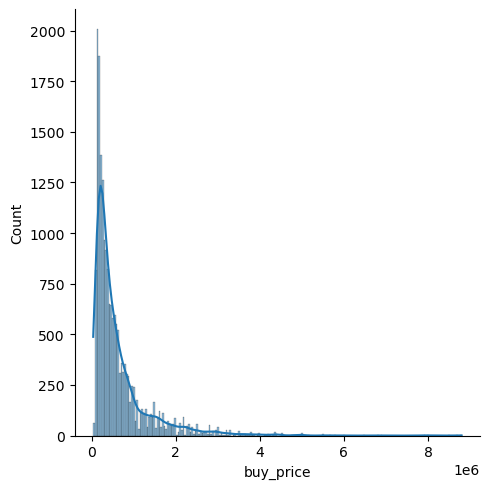

In [12]:
plt.figure( figsize=(12,8) )
# Plantearse descartar outliners (atípicos) para facilitar
# el entrenamiento de la red neuronal
sns.displot(df["buy_price"], kde=True)

/home/hisham/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='n_rooms', ylabel='count'>

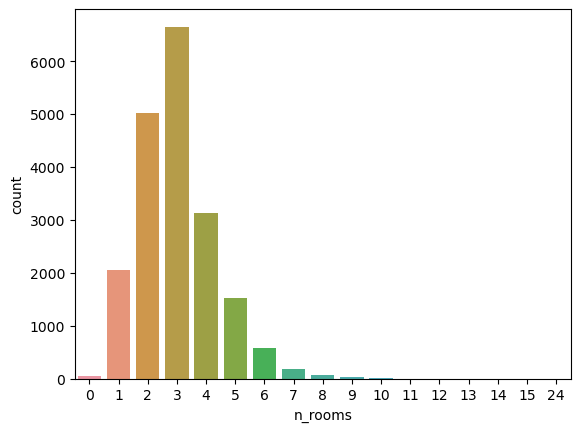

In [13]:
sns.countplot(df["n_rooms"])

In [14]:
# Ver que variables tienen mayor corelación con el precio
df.corr()["buy_price"].sort_values()

id                        -0.195828
is_floor_under            -0.149768
is_new_development        -0.013903
is_renewal_needed          0.052132
is_exact_address_hidden    0.167964
has_parking                0.315350
n_rooms                    0.578291
buy_price_by_area          0.581698
n_bathrooms                0.753692
sq_mt_built                0.831700
rent_price                 0.920350
buy_price                  1.000000
is_rent_price_known             NaN
is_buy_price_known              NaN
Name: buy_price, dtype: float64

In [15]:
# Ver variables altamente relacionadas con la salida

<AxesSubplot:xlabel='buy_price', ylabel='sq_mt_built'>

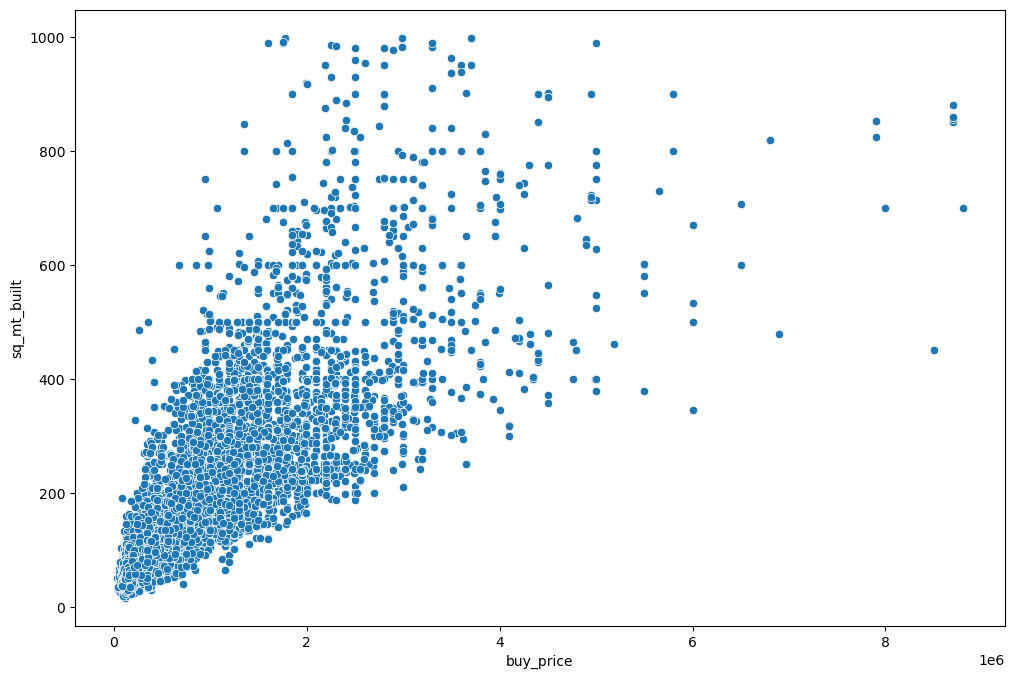

In [19]:
plt.figure( figsize=(12,8) )
sns.scatterplot( x="buy_price", y="sq_mt_built", data=df )

<AxesSubplot:xlabel='n_bathrooms', ylabel='buy_price'>

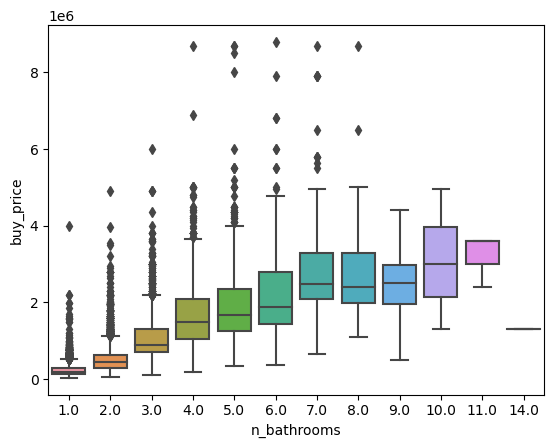

In [20]:
sns.boxplot( x="n_bathrooms", y="buy_price", data=df )

## 3.3 Limpieza final

### 3.3.1 Eliminar columnas no correlacionadas

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19310 entries, 0 to 21740
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       19310 non-null  int64  
 1   title                    19310 non-null  object 
 2   subtitle                 19310 non-null  object 
 3   sq_mt_built              19310 non-null  float64
 4   n_rooms                  19310 non-null  int64  
 5   n_bathrooms              19310 non-null  float64
 6   is_exact_address_hidden  19310 non-null  bool   
 7   is_floor_under           19310 non-null  float64
 8   neighborhood_id          19310 non-null  object 
 9   operation                19310 non-null  object 
 10  rent_price               19310 non-null  float64
 11  is_rent_price_known      19310 non-null  bool   
 12  buy_price                19310 non-null  int64  
 13  buy_price_by_area        19310 non-null  int64  
 14  is_buy_price_known    

In [23]:
df = df.drop(['id','title','subtitle','is_exact_address_hidden','is_renewal_needed','neighborhood_id','operation','is_rent_price_known','is_buy_price_known','buy_price_by_area','is_buy_price_known','house_type_id','energy_certificate'],axis=1)

In [24]:
df.head(5)

,sq_mt_built,n_rooms,n_bathrooms,is_floor_under,rent_price,buy_price,is_new_development,has_parking
0,64.0,2,1.0,0.0,471.0,85000,0.0,False
1,70.0,3,1.0,0.0,666.0,129900,0.0,False
2,94.0,2,2.0,0.0,722.0,144247,0.0,False
3,64.0,2,1.0,1.0,583.0,109900,0.0,False
4,108.0,2,2.0,0.0,1094.0,260000,0.0,True


# 4. Train test split

In [25]:
x = df.drop("buy_price", axis=1)
y = df["buy_price"]

In [26]:
from sklearn.model_selection import train_test_split as ttSplit

In [27]:
x_train, x_test, y_train, y_test = ttSplit(x, y, test_size=0.2, random_state=101)

In [28]:
x_train.shape

(15448, 7)

In [29]:
x_test.shape

(3862, 7)

# 5. Escalado

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()

In [32]:
x_train

,sq_mt_built,n_rooms,n_bathrooms,is_floor_under,rent_price,is_new_development,has_parking
2160,87.0,2,1.0,0.0,913.0,0.0,False
13201,150.0,2,2.0,1.0,1839.0,0.0,True
14224,682.0,24,4.0,0.0,6864.0,0.0,False
17339,154.0,5,5.0,0.0,2510.0,0.0,False
5298,70.0,3,1.0,0.0,621.0,0.0,False
...,...,...,...,...,...,...,...
6473,67.0,2,1.0,0.0,762.0,0.0,False
9240,146.0,3,2.0,0.0,2070.0,1.0,True
19993,104.0,2,1.0,0.0,1890.0,0.0,False
20197,85.0,2,2.0,0.0,1197.0,0.0,False


In [33]:
x_train = scaler.fit_transform(x_train)

In [34]:
x_train

array([[0.07230143, 0.08333333, 0.        , ..., 0.07122394, 0.        ,
        0.        ],
       [0.13645621, 0.08333333, 0.07692308, ..., 0.14491485, 0.        ,
        1.        ],
       [0.67820774, 1.        , 0.23076923, ..., 0.54480344, 0.        ,
        0.        ],
       ...,
       [0.08961303, 0.08333333, 0.        , ..., 0.14897342, 0.        ,
        0.        ],
       [0.07026477, 0.08333333, 0.07692308, ..., 0.09382461, 0.        ,
        0.        ],
       [0.10183299, 0.08333333, 0.07692308, ..., 0.18040745, 0.        ,
        0.        ]])

In [37]:
x_test = scaler.transform(x_test)

/home/hisham/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [38]:
x_train.shape

(15448, 7)

In [39]:
x_test.shape

(3862, 7)

# 6. Creación de modelo

# 7. Entrenamiento del modelo

# 8. Evaluación del modelo